# KMeans Clustering - BA Customer Behavior

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

%matplotlib inline 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('customer_booking.csv', encoding="ISO-8859-1")
print(df.shape)
df.head()

(50000, 14)


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


### 1. Variable Encoding

In [3]:
encoded_df = df.copy()

In [4]:
LE = LabelEncoder()
mapping = []
columns = ['sales_channel', 'trip_type', 'flight_day', 'booking_origin', 'route']

In [5]:
def encode_vars(column_list, data):
    
    for i in columns:
        data[str(i)] = LE.fit_transform(data[str(i)])
        cat_mapping = dict(zip(LE.classes_, LE.transform(LE.classes_)))
        mapping.append(cat_mapping)
    return mapping

In [6]:
x = encode_vars(columns, encoded_df)

### 2. Data Scaling

In [7]:
encoded_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,2,262,19,7,2,0,61,1,0,0,5.52,0
1,1,0,2,112,20,3,2,0,61,0,0,0,5.52,0
2,2,0,2,243,22,17,6,0,36,1,1,0,5.52,0
3,1,0,2,96,31,4,2,0,61,0,0,1,5.52,0
4,2,0,2,68,22,15,6,0,36,1,0,1,5.52,0


In [8]:
ss = StandardScaler()

scaled_matrix = ss.fit_transform(encoded_df)

scaled_df = pd.DataFrame(scaled_matrix, columns= df.columns)
scaled_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.400684,-0.355785,0.095325,1.957530,-0.119353,-0.381764,-0.527073,-1.724217,0.694118,0.703747,-0.649919,-0.863497,-1.174175,-0.419359
1,-0.579559,-0.355785,0.095325,0.299164,-0.089844,-1.120780,-0.527073,-1.724217,0.694118,-1.420965,-0.649919,-0.863497,-1.174175,-0.419359
2,0.400684,-0.355785,0.095325,1.747470,-0.030824,1.465775,1.443552,-1.724217,-0.069097,0.703747,1.538654,-0.863497,-1.174175,-0.419359
3,-0.579559,-0.355785,0.095325,0.122272,0.234761,-0.936026,-0.527073,-1.724217,0.694118,-1.420965,-0.649919,1.158082,-1.174175,-0.419359
4,0.400684,-0.355785,0.095325,-0.187290,-0.030824,1.096267,1.443552,-1.724217,-0.069097,0.703747,-0.649919,1.158082,-1.174175,-0.419359


## (B). KMeans
### 1. Elbow Curve

In [9]:
def get_inertia(data, min_r= 1, max_r= 2):
    
    X = data
    
    inertia_score = []
    
    for cluster in range(min_r, max_r, 1):
        
        kmeans = KMeans(n_clusters = cluster, n_init = 8, random_state = 42)
        kmeans.fit(X)
        
        score = kmeans.inertia_
        
        inertia_score.append(score)
        
    return inertia_score

In [10]:
c_segment = get_inertia(scaled_df, min_r= 1, max_r= 21)

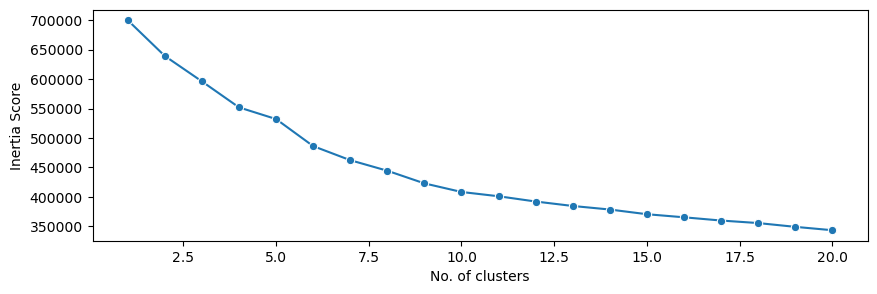

In [11]:
plt.figure(figsize= (10,3), dpi= 100)
sns.lineplot(x= (i for i in range(1,21,1)), y = c_segment, marker = 'o')
plt.xlabel('No. of clusters')
plt.ylabel('Inertia Score')
plt.show()

### 2. Final Clusters

In [12]:
X = scaled_df

kmeans = KMeans(n_clusters= 13, n_init= 8, random_state= 42)

kmeans.fit(X)

df['Segment'] = kmeans.labels_

print('Inertia for 13 Clusters is: {}'.format(kmeans.inertia_))

Inertia for 13 Clusters is: 384474.0904830927


In [13]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,Segment
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0,4
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0,4
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0,11


## (C). Cluster Interpretation

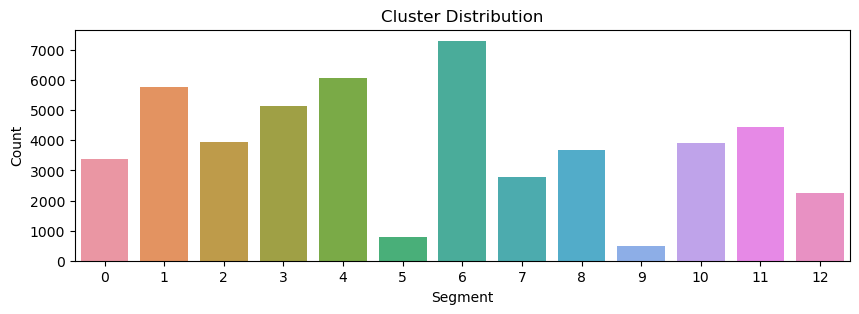

In [14]:
plt.figure(figsize= (10,3), dpi= 100)
sns.barplot(x= df['Segment'].value_counts().index, y= df['Segment'].value_counts().values)
plt.xlabel('Segment')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()

<Axes: xlabel='purchase_lead', ylabel='length_of_stay'>

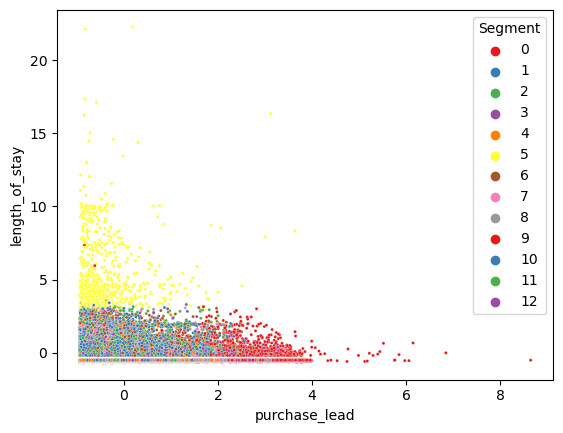

In [15]:
sns.scatterplot(data = df, x= scaled_df['purchase_lead'], y = scaled_df['length_of_stay'], s= 5, hue= 'Segment', palette= 'Set1')